## Data visualization ##

In [186]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime


In [187]:
df = pd.read_csv('/Users/davidusuariocasa/Desktop/Projects/ETL_project/Data/scrapped_clean.csv') # We open our CSV


## Analysis of movie durations ## 

In [188]:
'''First of all, not all winning categories are films, some are documentaries. This kind of categories have a 
shorter duration and are not really movies, so we are going to take them out of our analysis'''

categories_to_take = ['Documentary (short Subject)', 'Short Subject (cartoon)', 'Short Subject (comedy)', 'Short Subject (novelty)', 'Short Subject (color)', 'Short Subject (two-reel)', 'Short Subject (one-reel)', 'Short Subject (live Action)', 'Short Subject (animated)', 'Short Film (animated)', 'Short Film (dramatic Live Action)', 'Short Film (live Action)', 'Documentary', 'Documentary (feature)', 'Documentary (short Subject)', 'Documentary Feature Film', 'Documentary Short Film']

df_copy = df.copy() # We create a copy to not manipulate our original dataframe 

df_copy = df_copy[~df_copy['Winning category'].isin(categories_to_take)]
df_copy = df_copy.reset_index()
df_copy = df_copy.drop('index', axis=1)
df_copy


,Film year,Ceremony year,Ceremony number,Winning category,Winner name,Film title,Film Duration,Film score
0,1927,1928,1,Actor,Emil Jannings,The Last Command,88,8.0
1,1927,1928,1,Art Direction,William Cameron Menzies,The Dove;,90,6.5
2,1927,1928,1,Cinematography,Charles Rosher,Sunrise,94,8.1
3,1927,1928,1,Cinematography,Karl Struss,Sunrise,94,8.1
4,1927,1928,1,Directing (comedy Picture),Lewis Milestone,Two Arabian Knights,92,6.7
...,...,...,...,...,...,...,...,...
1717,2022,2023,95,Sound,"Mark Weingarten, James H. Mather, Al Nelson, C...",Top Gun: Maverick,130,8.3
1718,2022,2023,95,Visual Effects,"Joe Letteri, Richard Baneham, Eric Saindon and...",Avatar: The Way of Water,192,7.6
1719,2022,2023,95,Writing (adapted Screenplay),Screenplay by Sarah Polley,Women Talking,104,6.9
1720,2022,2023,95,Writing (original Screenplay),Written by Daniel Kwan & Daniel Scheinert,Everything Everywhere All at Once,139,7.8


In [189]:
'''Now, we check how many remaining movies have a duration of less than 45 mins (as the minimun duration to
be considered a movie), as well as those that didnt get the duration right, and have a 0'''

remaining = df_copy[df_copy['Film Duration'] <=45]

'''Now, we drop the remaining rows from our df, and reset the indexes'''

df_copy = df_copy.drop(remaining.index)
df_copy = df_copy.reset_index()
df_copy = df_copy.drop('index', axis=1)

In [190]:
'''We calculate some basic descriptive statistics. We can see that the mean of the duration of the movies (that
have won an Oscar) is 129 mins'''

df_copy['Film Duration'].describe() 

count    1712.000000
mean      129.223715
std        30.750531
min        60.000000
25%       108.000000
50%       123.000000
75%       142.000000
max       312.000000
Name: Film Duration, dtype: float64

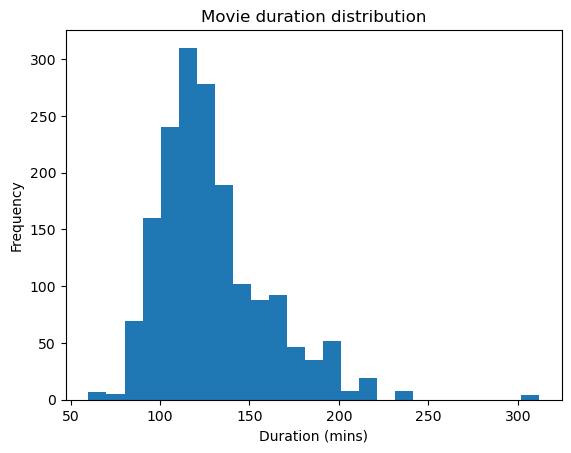

In [191]:
'''Here we see an histogram of how the movies duration are distributed. 
We see that most movies are in that 120 mean'''

plt.hist(df_copy['Film Duration'], bins=25)
plt.xlabel('Duration (mins)')
plt.ylabel('Frequency')
plt.title('Movie duration distribution')
plt.show()

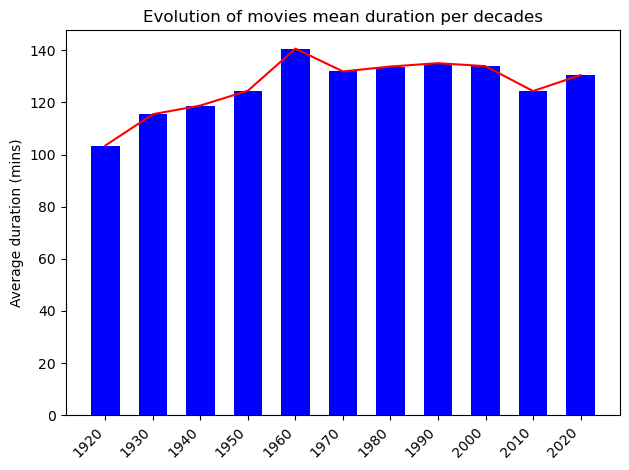

'Our graphic shows that the mean of the duration of our movies has grew a lot until \nthe 1960s (from 105 to 140 mins aprox), and has stayed pretty much stable since then'

In [192]:
'''Here we see how the mean of movies duration has varied over time per decades'''

# We convert our column 'Film year' to datetime 
df_copy['Film year'] = pd.to_datetime(df_copy['Film year'], format='%Y')

# We group our data by decades, and then calculate the mean of duration per decade 
df_copy['Decade'] = df_copy['Film year'].dt.year // 10 * 10
avg_duration_by_decade = df_copy.groupby('Decade')['Film Duration'].mean()

# We create a list with all decades from 1920 to 2020 so that we cover all our films 
decades = pd.date_range(start='1920', end='2030', freq='10Y').year

# We configure our graphic with its line 
fig, ax = plt.subplots()
ax.bar(avg_duration_by_decade.index, avg_duration_by_decade.values, color='blue', width=6)
ax.plot(avg_duration_by_decade.index, avg_duration_by_decade.values, color='red')

# We make our x axis cover all decades 
ax.set_xticks(decades)
ax.set_xticklabels(decades, rotation=45, ha='right')

# We set our title and labels
ax.set_ylabel('Average duration (mins)')
ax.set_title('Evolution of movies mean duration per decades')

# Show graphic
plt.tight_layout()
plt.show()

'''Our graphic shows that the mean of the duration of our movies has grew a lot until 
the 1960s (from 105 to 140 mins aprox), and has stayed pretty much stable since then'''


## Analysis of movie scores ## 

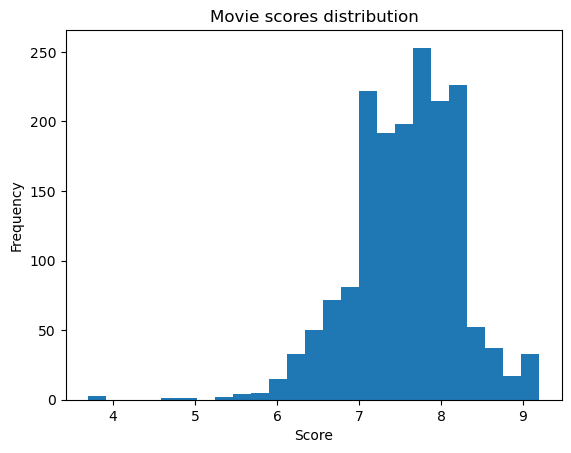

In [193]:
'''df['Film score'].hist(bins=10, figsize=(10, 6))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Movie scores distribution')
plt.show()'''

df_copy2 = df_copy.copy() # We create another copy of our copy

plt.hist(df_copy2['Film score'], bins=25)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Movie scores distribution')
plt.show()


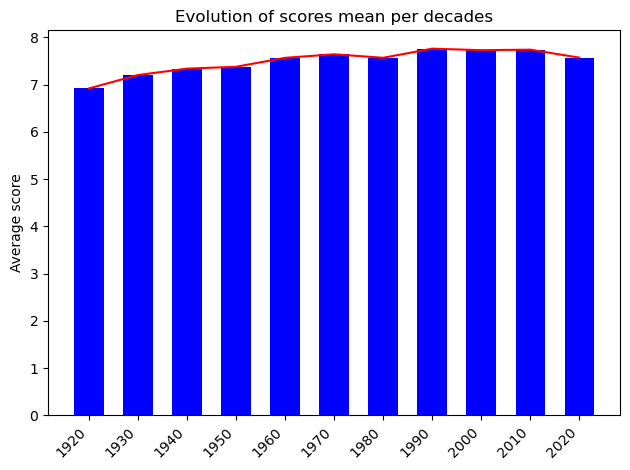

'Our graphic shows that the mean of the scores of our movies has slowly grown per decades'

In [194]:
'''Here we see how the mean of movies score has varied over time per decades'''

# We convert our column 'Film year' to datetime 
df_copy2['Film year'] = pd.to_datetime(df_copy2['Film year'], format='%Y')

# We group our data by decades, and then calculate the mean of score per decade 
df_copy['Decade'] = df_copy2['Film year'].dt.year // 10 * 10
avg_duration_by_decade = df_copy2.groupby('Decade')['Film score'].mean()

# We create a list with all decades from 1920 to 2020 so that we cover all our films 
decades = pd.date_range(start='1920', end='2030', freq='10Y').year

# We configure our graphic with its line 
fig, ax = plt.subplots()
ax.bar(avg_duration_by_decade.index, avg_duration_by_decade.values, color='blue', width=6)
ax.plot(avg_duration_by_decade.index, avg_duration_by_decade.values, color='red')

# We make our x axis cover all decades 
ax.set_xticks(decades)
ax.set_xticklabels(decades, rotation=45, ha='right')

# We set our title and labels
ax.set_ylabel('Average score')
ax.set_title('Evolution of scores mean per decades')

# Show graphic
plt.tight_layout()
plt.show()

'''Our graphic shows that the mean of the scores of our movies has slowly grown per decades'''

## Is there correlation between the score of the movie and its duration? ##

Correlation coeficient: 0.37387465396758607


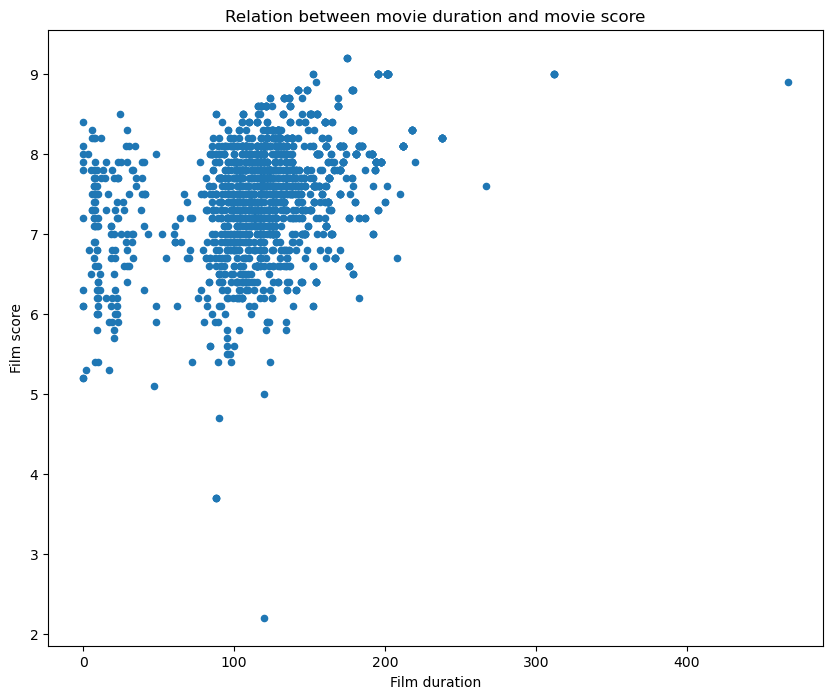

In [200]:
'''Now we want to see if there is any correlation between a movie's duration and its score'''

# We get our columns 
duration_score_df = df[['Film Duration', 'Film score']]

# We create our graphic 
duration_score_df.plot.scatter(x='Film Duration', y='Film score', figsize=(10,8))
plt.xlabel('Film duration')
plt.ylabel('Film score')
plt.title('Relation between movie duration and movie score')

# We calculate the correlation coeficient 
correlation = duration_score_df['Film Duration'].corr(duration_score_df['Film score'])
print("Correlation coeficient:", correlation)

'''There is barely correlation between a movie's duration and its score'''


## Analysis of the most awarded categories ## 

In [204]:
'''First, we take the top 10 most awarded categories. As we can see, the category 'Directing' is the most awarded'''

category_counts = df['Winning category'].value_counts()
category_counts = category_counts.head(10)

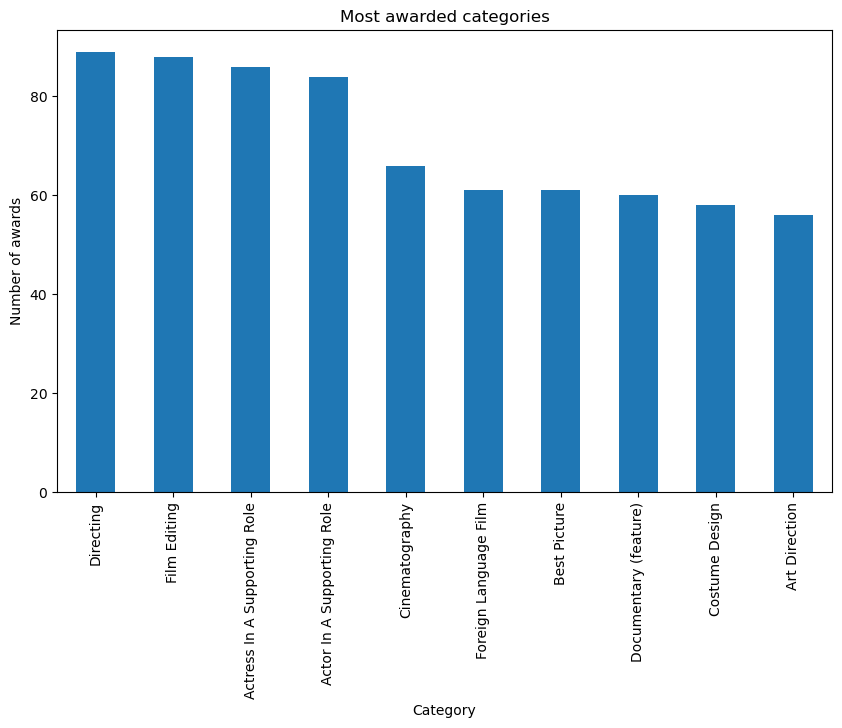

In [209]:
category_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Number of awards')
plt.title('Most awarded categories')
plt.show()


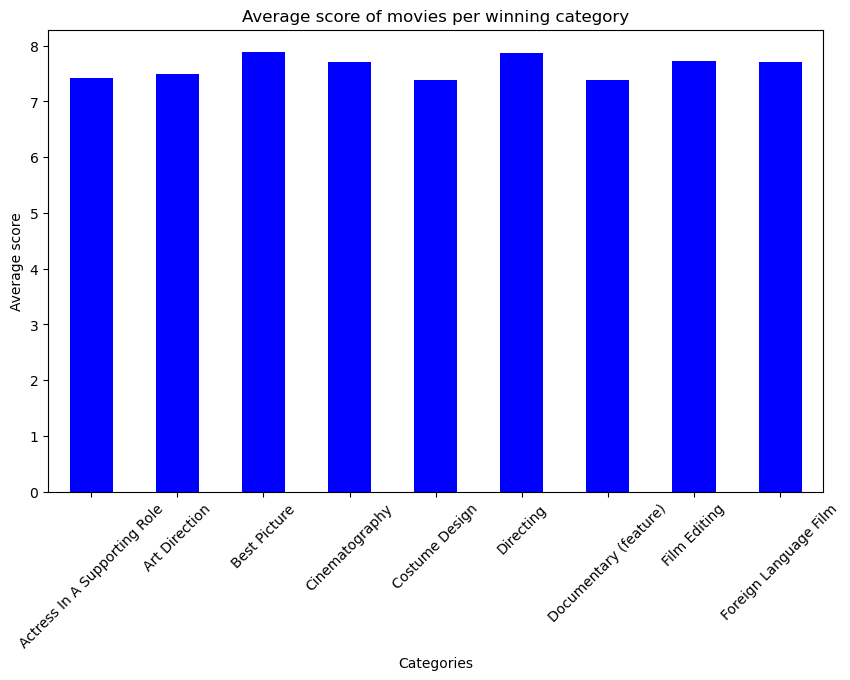

'We see that the category that contains the movies with the highest score mean is \'Best picture\', \nfollowed by "Directing"'

In [213]:
'''Finally, we want to see the average score of the winning movies from each category'''

# We filter our df per top 10 categories
top_10_categories = ['Directing', 'Film Editing', 'Actress In A Supporting Role', 'Actor in a supporting role'
                    , 'Cinematography', 'Foreign Language Film', 'Best Picture', 'Documentary (feature)', 
                    'Costume Design', 'Art Direction'] 

df_top_10 = df[df['Winning category'].isin(top_10_categories)]

# Calculate the average of scores per category 
average_score = df_top_10.groupby('Winning category')['Film score'].mean()

# We create our graphic 
plt.figure(figsize=(10, 6))
average_score.plot(kind='bar', color='blue')
plt.xlabel('Categories')
plt.ylabel('Average score')
plt.title('Average score of movies per winning category')
plt.xticks(rotation=45)
plt.show()

'''We see that the category that contains the movies with the highest score mean is 'Best picture', 
followed by "Directing"'''
